# Visión Artificial: Fundamentos de OpenCV 

## Alumna: Paola Rodríguez Medrano 16111696

In [1]:
# Importando libreria
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

### 1. Breve descripción de OpenCV

OpenCV se inició en Intel en el año 1999 por Gary Bradsky. El primer lanzamiento llegó un poco más tarde en el año 2000. OpenCV esencialmente significa Open Source Computer Vision Library. Aunque está escrito en C / C ++, tiene librerias para Python y Java junto con C ++. OpenCV se jacta de tener una base de usuarios activa en todo el mundo, y su uso aumenta día a día debido al aumento de las aplicaciones de visión por computadora.

### 2. Imágenes como arreglos

Una imagen no es más que un arreglo estándar de Numpy que contiene píxeles de puntos de datos. Cuanto mayor sea el número de píxeles en una imagen, mejor es su resolución. Puede pensar que los píxeles son pequeños bloques de información dispuestos en forma de una cuadrícula de 2 D, y la profundidad de un píxel se refiere a la información de color presente en ella. Para ser procesado por una computadora, una imagen debe convertirse en una forma binaria. El color de una imagen se puede calcular de la siguiente manera:

Número de colores / sombras = 2 ^ bpp donde bpp representa bits por píxel.

Naturalmente, más cantidad de bits / píxeles, más colores posibles en las imágenes. La siguiente tabla muestra la relación más claramente.

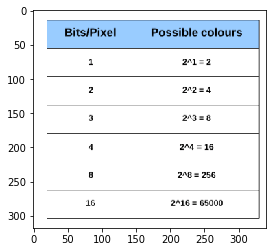

In [2]:
imgen_tabla=mpimg.imread('tabla.png')
imgplot = plt.imshow(imgen_tabla)
plt.show()

### Veamos ahora la representación de los diferentes tipos de imágenes:

### 1. Imagen binaria

Una imagen binaria consta de 1 bit / píxel y, por lo tanto, solo puede tener dos colores posibles, es decir, blanco o negro. El negro está representado por el valor 0 mientras que el 1 representa el blanco.

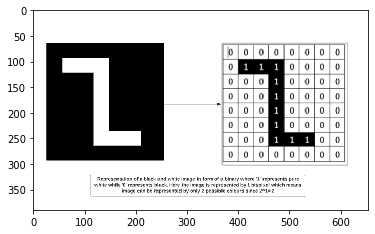

In [3]:
imgen_tabla=mpimg.imread('imagen_binaria.png')
imgplot = plt.imshow(imgen_tabla)
plt.show()

### 2. Imagen en escala de grises

Una imagen en escala de grises consta de 8 bits por píxel. Esto significa que puede tener 256 tonos diferentes donde 0 píxeles representarán el color negro mientras 255 denota el blanco. Por ejemplo, la imagen a continuación muestra una imagen en escala de grises representada en forma de arreglo. Una imagen en escala de grises tiene solo 1 canal donde el canal representa la dimensión.

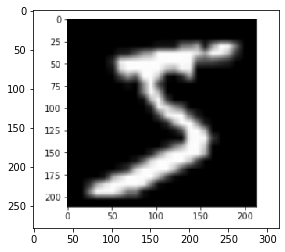

In [4]:
imgen_tabla=mpimg.imread('imagen_escala_gris.png')
imgplot = plt.imshow(imgen_tabla)
plt.show()

### 3. Imagen coloreada

Las imágenes en color se representan como una combinación de rojo, azul y verde, y todos los demás colores se pueden lograr mezclando estos colores primarios en las proporciones correctas.

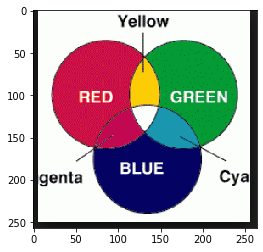

In [5]:
imgen_tabla=mpimg.imread('imagen_coloreada.png')
imgplot = plt.imshow(imgen_tabla)
plt.show()

Una imagen en color también consta de 8 bits por píxel. Como resultado, se pueden representar 256 tonos de colores diferentes con 0 que denota negro y 255 blanco. Veamos la famosa imagen en color de un mandril que se ha citado en muchos ejemplos de procesamiento de imágenes.

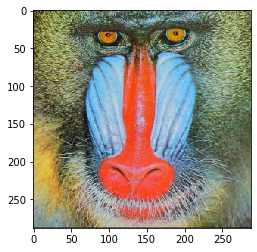

In [6]:
imgen_tabla=mpimg.imread('mandril_coloreado.jpg')
imgplot = plt.imshow(imgen_tabla)
plt.show()

Si comprobáramos la forma de la imagen de arriba, obtendríamos:

Forma
(288, 288, 3)
288: ancho de píxel
288: altura de píxel
3: canal de color

Esto significa que podemos representar la imagen de arriba en forma de un arreglo tridimensional

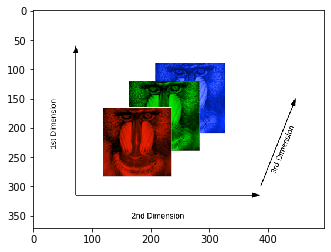

In [7]:
imgen_tabla=mpimg.imread('arreglo_3d.png')
imgplot = plt.imshow(imgen_tabla)
plt.show()

## 3. Imágenes y OpenCV

Antes de saltar al proceso de detección de rostros, aprendamos algunos conceptos básicos sobre cómo trabajar con OpenCV. En esta sección realizaremos operaciones simples en imágenes usando OpenCV como abrir imágenes, dibujar formas simples en imágenes e interactuar con imágenes a través de devoluciones de llamada. 

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Lea la imagen con la función imread. Utilizaremos la imagen coloreada "mandril"

In [9]:
img_raw = cv2.imread('mandril_coloreado.jpg')

El tipo y la forma del arreglo

In [10]:
type(img_raw)
np.ndarray
img_raw.shape

(288, 288, 3)

Por lo tanto, la imagen .png se transforma en un arreglo numpy con una forma de 288x288 y tiene 3 canales.

Viendo la imagen

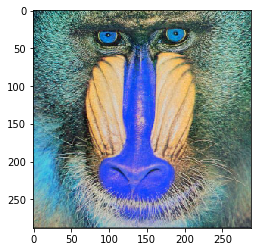

In [11]:
plt.imshow(img_raw)

Lo que obtenemos como resultado es un poco diferente con respecto al color. Esperábamos una imagen de colores brillantes, pero lo que obtenemos es una imagen con cierto matiz azulado. Esto sucede porque OpenCV y matplotlib tienen diferentes órdenes de colores primarios. Mientras que OpenCv lee imágenes en forma de BGR, matplotlib, por otro lado, sigue el orden de RGB. Por lo tanto, cuando leemos un archivo a través de OpenCV, lo leemos como si contuviera canales en el orden de azul, verde, y rijo. Sin embargo mostramos a la imagen usando matplotlib, el canal rojo y el azul se intercambian y, por lo tanto, el tinte azul. Para evitar este problema, transformaremos el canal a cómo matplotlibespera que use la función cvtColor.

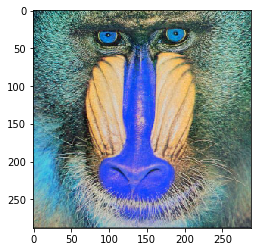

In [12]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_raw)

## Operaciones básicas en imágenes

En esta sección aprenderemos como dibujar varias formas en una imagen existente para tener una idea de cómo trabajar con OpenCV.

### Dibujando en imágenes 

Crea una imagen en negro que actuará como plantilla.

In [ ]:
image_blank = np.zeros(shape=(521,512,3), dtype=np.int16)

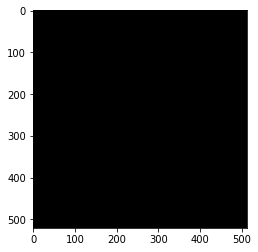

In [16]:
plt.imshow(image_blank)

## Función y atributos

La función general para dibujar formas i dibujos en imágenes es:

#### cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)

Hay algunos argumentos comunes que s epasan en función para dibujar figuras en las imágenes.

1) Imagen en la que se dibujarán las formas

2) Coordenadas de la fugura a dibujar desde Pt1 (arriba a la izquierda) a Pt2 (abajo a la derecha)

3) Color: el color d ela forma que se va a dibujar. Se pasa como una tupla, por ejemplo: (255,0,0). Para la escala de grisis, será la escala de brillo.

4) El grosor de la figura geométrica.

### a) Linea recta

Dibujar una línea recta a través de una imagen requiere específicar los puntos, a través de los cuales pasrá la línea.

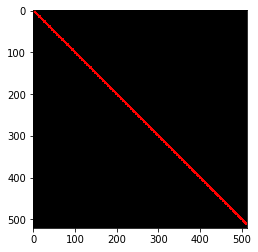

In [17]:
line_red = cv2.line(image_blank, (0,0), (511,511), (255,0,0),5)
plt.imshow(line_red)

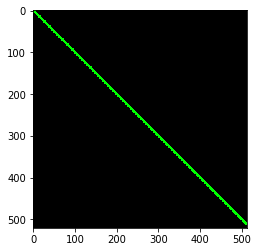

In [19]:
line_green = cv2.line(image_blank, (0,0), (511,511), (0,255,0),5)
plt.imshow(line_green)

### b) Rectángulo 

Para un rectángulo, necesitamos específicar las coordenadas superior izquierda e inferior derecha.

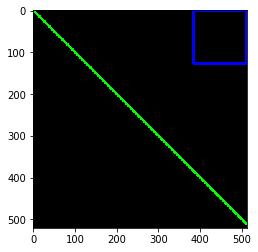

In [20]:
rectangle = cv2.rectangle(image_blank, (384,0), (510,128), (0,0,255),5)
plt.imshow(rectangle)

### Escribir en imágenes 

Agregar texto a las imágenes también es similar a dibujar formas en ellas. Pero debe específicar ciertos argumentos antes de hacerlo.

1) Texto a escribir

2) Coordenas del texto. El texto en una imagen comienza desde la dirección inferior izquierda

3) Tipo de fuente y escala

4) Otros atributos como color, grosor y tipo de líneas. Normalmente, el tipo de línea que se usa es lineType = cv2.LINE_AA.

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(image_blank, 'OpenCV', (10,300), font, 4(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

TypeError: 'int' object is not callable